In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils

# データを変数に格納する。
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# データの前処理
# (60000, 28, 28)の3階テンソルを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(60000, 784)
# (10000, 28, 28)の3階テンソルを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(10000, 784)

# データを255.0で割って0から1.0の範囲に変換
x_train = x_train/255.0
# データを255.0で割って0から1.0の範囲に変換
x_test = x_test/255.0

# 正解ラベルのクラス数
num_classes = 10
# 訓練データの正解ラベルをワンホット表現に変換
y_train = utils.to_categorical(y_train, num_classes)
# テストデータの正解ラベルをンホット表現に変換
y_test = utils.to_categorical(y_test, num_classes)

In [2]:
# ニューラルネットワークの作成

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ニューラルネットワークモデルの基盤を生成
model = Sequential()

# 第1層の作成
model.add(Dense(
    512,                 # 第1層のニューロン数は512
    input_shape=(784,),  # 入力データの形状は要素数784の1階テンソル
    activation='relu'    # 活性化関数はReLU
    ))
# 第1層の次に25%のドロップアウトを配置
model.add(Dropout(rate=0.25))

# 第2層の作成
model.add(Dense(
    512,                 # 第2層のニューロン数は512
    input_shape=(784,),  # 第0層のデータ形状は要素数784の1階テンソル
    activation='relu'    # 活性化関数はReLU
    ))
# 第2層の次に25%のドロップアウトを配置
model.add(Dropout(rate=0.25))

# 第3層(出力層)の作成
model.add(Dense(
    num_classes,         # 第3層のニューロン数は10
    activation='softmax' # 活性化関数はソフトマックス
    ))

# バックプロパゲーションを実装してコンパイル
model.compile(
    loss='categorical_crossentropy', # 誤差関数を交差エントロピー誤差にする
    optimizer=Adam(),                # 学習方法をSGDの進化版Adamにする
    metrics=['accuracy'])            # 学習評価には正解率を使う

In [3]:
%%time

# 学習を実行する。
history = model.fit(
    x_train,            # 訓練データ
    y_train,            # 正解ラベル
    batch_size=50,      # ミニバッチのサイズ
    epochs=10,          # 学習する回数
    verbose=1,          # 学習の進捗状況を出力する
    validation_data=(
        x_test, y_test) # テストデータの指定
    )

Epoch 1/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.5165 - accuracy: 0.8135 - val_loss: 0.4262 - val_accuracy: 0.8425
Epoch 2/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.3984 - accuracy: 0.8536 - val_loss: 0.3879 - val_accuracy: 0.8588
Epoch 3/10
1200/1200 [==============================] - 10s 9ms/step - loss: 0.3653 - accuracy: 0.8658 - val_loss: 0.3506 - val_accuracy: 0.8734
Epoch 4/10
1200/1200 [==============================] - 10s 9ms/step - loss: 0.3454 - accuracy: 0.8727 - val_loss: 0.3595 - val_accuracy: 0.8718
Epoch 5/10
1200/1200 [==============================] - 10s 9ms/step - loss: 0.3335 - accuracy: 0.8757 - val_loss: 0.3465 - val_accuracy: 0.8729
Epoch 6/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.3202 - accuracy: 0.8819 - val_loss: 0.3435 - val_accuracy: 0.8752
Epoch 7/10
1200/1200 [==============================] - 10s 9ms/step - loss: 0.3084 - accuracy: 0.8855 - val_loss: 0.3313 - val_accu

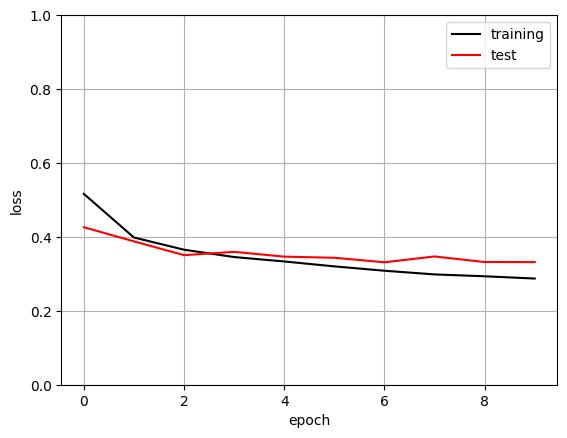

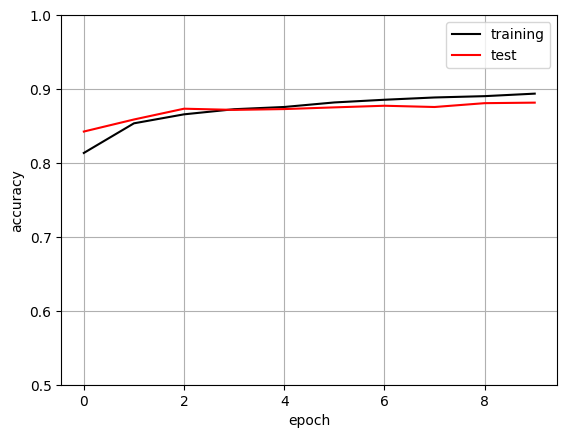

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 訓練データの損失(誤り率)をプロット
plt.plot(
    history.history['loss'],
    label='training',
    color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(
    history.history['val_loss'],
    label='test',
    color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練データの正解率をプロット
plt.plot(
    history.history['accuracy'],
    label='training',
    color='black')
# テストデータの正解率をプロット
plt.plot(
    history.history['val_accuracy'],
    label='test',
    color='red')
plt.ylim(0.5, 1)      # y軸の範囲
plt.legend()          # 凡例を表示
plt.grid()            # グリッド表示
plt.xlabel('epoch')   # x軸ラベル
plt.ylabel('accuracy')# y軸ラベル
plt.show()